In [1]:
%matplotlib inline

/Users/nhdaly/homebrew/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [43]:
from matplotlib import pyplot as plt
import numpy as np

In [48]:
FFMPEG_BIN = 'ffmpeg'
frame_width  = 48
frame_height = 54
frame_depth  =  3 # (number of colors)
frame_dim = (frame_height, frame_width, frame_depth)  # height x width x num_colors(depth)

In [49]:
import subprocess as sp
command = [ FFMPEG_BIN,
            '-i', 'fareeds_take.2015.09.21.speech.full_res.crop.048x054.mov',
            '-f', 'image2pipe',
            '-pix_fmt', 'rgb24',
            '-vcodec', 'rawvideo', '-']
video_pipe = sp.Popen(command, stdout = sp.PIPE, bufsize=10**8)

In [50]:
# Import the movie file into a python array of images.

from IPython import display

frames = []
while video_pipe:
    # read 1 frame bytes
    raw_image = video_pipe.stdout.read(frame_dim[0]*frame_dim[1]*frame_dim[2])
    if not raw_image:
        break
    # transform the byte read into a numpy array
    image =  np.fromstring(raw_image, dtype='uint8')
    image = image.reshape(frame_dim)
    frames.append(image)
    # throw away the data in the pipe's buffer.
    video_pipe.stdout.flush()
    
len(frames)

4740

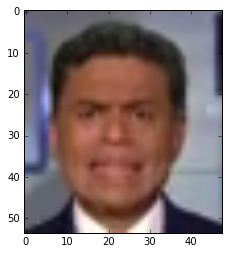

In [51]:
def play_frames_clip(frames):
    ''' frames -- a list/array of np.array images. Plays all frames in the notebook as a clip.'''
    for frame in frames:
        plt.imshow(frame)
        display.display(plt.gcf())
        display.clear_output(wait=True)

play_frames_clip(frames[10:20])

### Build the Discriminator

In [41]:
import tensorflow as tf

ImportError: No module named tensorflow

In [29]:
# Down-scale the image.
import scipy
import scipy.misc
new_shape = np.array(image.shape) / 3
new_shape[2] = 3
small_image = scipy.misc.imresize(image, new_shape)

(36, 32, 3)

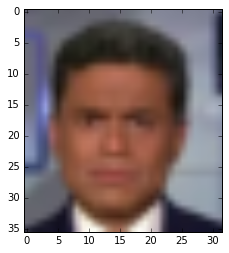

In [30]:
plt.imshow(small_image)
small_image.shape